# Term Project


Lijun Wang      
1001778502

The dataset we used is the board-game-geek-reviews data. Project's goal is given the review, predict the rating. 

### loading and preprocessing data 
Because our goal is given the review, predict the rating. We only need to use the bgg-13m-reviews.csv. 

In [1]:
import numpy as np 
import pandas as pd 

import os
data = pd.read_csv('/kaggle/input/boardgamegeek-reviews/bgg-13m-reviews.csv')
len(data)

13170073

we can see there are 13170073 record in this table.

In [2]:
data.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


I show the first five record in this table. We can see there are some NaN value in comment column. Because we want to get rating based comment. If the comment is NaN, this record is useless. We need remove it.

In [3]:
data1 = data.dropna(axis=0,how='any')

There are 2637756 records left.

In [4]:
len(data1)

2637756

I show the first-five records after drop those records that commends equals NaN. 

In [5]:
data1.head()

,Unnamed: 0,user,rating,comment,ID,name
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
7,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan
11,11,daredevil,10.0,This is probably the best game I ever played. ...,13,Catan
16,16,hurkle,10.0,Fantastic game. Got me hooked on games all ove...,13,Catan


Show the description of those records.

In [6]:
data1.describe()

,Unnamed: 0,rating,ID
count,2.637756e+06,2.637756e+06,2.637756e+06
mean,4.165498e+06,6.852070e+00,6.693990e+04
std,2.926932e+06,1.775769e+00,7.304447e+04
min,2.000000e+00,1.401300e-45,1.000000e+00
25%,1.691259e+06,6.000000e+00,3.955000e+03
50%,3.251858e+06,7.000000e+00,3.126000e+04
75%,6.737738e+06,8.000000e+00,1.296220e+05
max,9.871082e+06,1.000000e+01,2.724090e+05


We can see the value of rating is between 1 and 10, and there are many decimal fraction. And the predicted value is also between 1 and 10, so this is a regression task. And because the number of records is very large. I randomly selected 1000 records from the data set as experimental data.

In [62]:
data2 = data1.sample(1000)

Visual distrubution of ratings

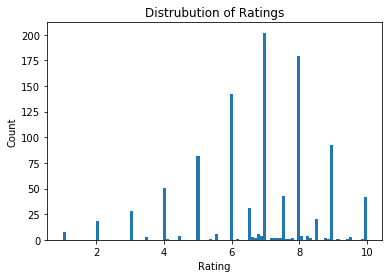

In [63]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(data2.rating, 100)

plt.title('Distrubution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Remove punctuation and special characters from comments. The word_list filled with the split comments.

In [64]:
import re
word_list = []
for text in data2['comment']:
    text = re.sub('\n', '', text)  
    text = re.sub('[\s+\.\!\/_,$%;^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+', ' ', text)
    word_list.append(' '.join(list(text.strip().split())))
print(word_list[:10])

['A cousin to Through the desert not as deep but nice Very short rules and fast game', 'Only played a short demo during a game fair Waiting to play a full game to adjust my vote I like the theme', 'Great little card game', 'Kickstarter - ETA Augustus 2017: this became January 2018', 'The game has a lot going for it but the high luck factor really disappointed me', 'Love the concept of the game but not the rules', 'After a few games I have strong desire to play more to figure out the best strategy', '', 'TTR minus route building plus a bit of pick-up-and-deliver Bonus points for stylish presentation and quick playtime but luck of the draw seemed too decisive and the mechanical innovations didn t justify the complexity bump Entirely possible that there s subtleties that whooshed over my head in a first play seeing as I got trounced) that might elevate this from a well-produced pleasant pastime to a game worthy of attention Ultimately games of economics should have more economics if you a

Use sklearn train_test_split method to divide it into training set and test set.

In [65]:
from sklearn.model_selection import train_test_split

target = data2['rating']
x_train,x_test,y_train,y_test=train_test_split(word_list,target,test_size=0.2,random_state=24)

print(x_train[:10])


['After several plays with or without the traitor this game is hard I think that being a little too eager to finish quests before they are necessary did us in as completing them doesn t stop the onslaught of black cards And if you re reading this I hate you Morgan My first play was the only one to use the traitor We had it rough trying to manage all of the possible quests and it turned out to be a good test of teamwork In the end we suspected a traitor but couldn t afford to be wrong in accusing him We should ve done it anyway', 'There is some game here but not a whole lot All in all I found this to be not bad but certainly not to the lofty levels that The Cauldron is at', 'My first almost card driven game And I still enjoy it', '3 a 5 jugadores - 1 hora', 'No Box', 'Review: https: boardgamegeek com thread 1168221 6-out-10-simple-game-zombie-slaughter-it-too-simpl', 'Not as much terrain as the Rise of the Valkyrie master set and the swamp tiles are not as useful as water tiles Lots of 

List stop words to be removed

In [66]:
stopwords = ['',',','"','.','+','-','!','?','*','/','@','1','2','3','4','5','6','7','8','9','#','$','%','&','^','(',')',':','...','a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',  'cannot', 'could', 'did', 'do', 'does', 'doing', 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', 'has', 'have', 'having', 'he', 'her', 'here',
 'hers', 'herself', 'him', 'himself', 'his', 'how',
 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself',
 'me', 'more', 'most', 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', 'she', 'should', 'so', 'some', 'such', 
 'than', 'that', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 
 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', 'we', 'were', 'what', 'when', 'where',
 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'would',
 'you', 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand']

Use CountVectorizer and TfidfTransformer to vectorize those comments.     
The model I used is RandomForestRegressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


### Fitting the model

In [67]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

reg = Pipeline([('vect',CountVectorizer(stop_words=stopwords, ngram_range=(1,3), token_pattern=u'[a-zA-Z]+', analyzer = 'word')),
                  ('tfidf',TfidfTransformer(use_idf=True,norm='l2')),
                  ('dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                  ('reg',RandomForestRegressor(n_estimators=20,max_depth=10,min_samples_split=8,max_features=None))])

scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')


The actual mean squared error is simply the positive version of the number you're getting. The unified scoring API always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. The score that is returned is therefore negated when it is a score that should be minimized and left positive if it is a score that should be maximized.

In [74]:
print("neg_mean_squared_error: %0.2f (+/- %0.2f) "   
        % (scores.mean(), scores.std()))

neg_mean_squared_error: -3.13 (+/- 0.72) 


In [75]:
scores

array([-2.26485484, -2.57459162, -2.99601265, -3.49517072, -4.30621316])

### Export the model

In [ ]:
joblib.dump(reg,'E:/RandomForest_reg.pkl')

### Reference

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor       

https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error      
